In [212]:
import pandas as pd
import numpy as np
import scipy
import datetime
from ggplot import *
import seaborn as sns
import statsmodels.api as sm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


##Section 0. References
#### Mann-Whitney test  https://storage.googleapis.com/supplemental_media/udacityu/4332539257/MannWhitneyUTest.pdf
####Seaborn documentation http://stanford.edu/~mwaskom/software/seaborn/index.html
***

##Section 1. Statistical Test
###1.1 Which statistical test did you use?
#### To analyze the subway data I used a two-tailed Mann-Whitney U-Test. The null (and alternative) hypothesis of the test was:
$$
H_0:P(x_R>x_D) = 0.5\\
H_A:P(x_R>x_D) \ne 0.5
$$
#### Here $x_R$ denotes a draw from the sample of rainy days, and $x_D$ denotes a sample from the dry days (non-rainy). The chosen critical value for $p$ was $p<0.05$.

###1.2 Why is the statistical test applicable to the data set?
#### The Mann-Whitney U-test is applicable because it deals with samples where we don't know the particular statistical distribution. The distribution of ridership certainly doesn't look like a normal distribution, and so the Mann-Whitney will have to do.

###1.3 What results did you get from the statistical test?
#### The result of the Mann-Whitney test was: 
$$
U = 1924409167\\
p = 0.0249999
$$
#### The two means were 1105 entries per hour when rain, and 1090 entries per hour when there was no rain.

###1.4 What is the significance and interpretation of this result?
#### The interpretation of this result is that the null hypothesis is rejected with a significance $p<0.05$, given our sample there's a 95% chance that there's an actual difference between the two averages.
#### A bonus interpretation is that the data likely have been altered by humans to give a p-value so incredibly close to $0.025$!
*****

##Section 2. Linear Regression
###2.1 What approach did you use to compute the coefficients theta and produce prediction for ENTRIESn_hourly in your regression model?
#### a: I used OLS from statsmodels.

###2.2 What features (input variables) did you use in your model? Did you use any dummy variables as part of your features?
#### I used rain, fog, hour and meantempi. I also included the units as dummy variables.

###2.3 Why did you select these features in your model?
#### I used Rain, fog, hour and meantempi. I though fog, rain and maentempi were the clearest indicators of a certain weather condition, and thus more likely to have a definite effect on the choice of subway riders. It's harder to believe that for example air pressure would make people take the same choice every time, and so I thought it would be less effective on the riders. Hour experimentally seemed to be the biggest indicator, unsurprisingly, as time of day and routines normally override weather when it comes to subway ridership (fog, or certain average air pressures, normally don't stop people form going to work at 08.00 in the morning.)

###2.4 What are the parameters (also known as "coefficients" or "weights") of the non-dummy features in your linear regression model?
####fog: 176.587733
####meantempi: -12.198258
####rain: -20.254019
####Hour: 65.323911

###2.5 What is your model’s $R^2$ (coefficients of determination) value?
#### The $R^2$ is 0.479832970696.

###2.6 What does this R2 value mean for the goodness of fit for your regression model?
#### It means that the sum of the squares of the residuals (difference between model and observation) is smaller than the sum of the variances, approximately half the size. It indicates that the model linear approximation fits better than simply using the mean as model, however not by very much. The fraction term in the formula for $R^2$ equals approximately 0.52, and so the sum of squares of residuals is more than half of the total sum of squares. The $R^2$ indicates that the model is in the right direction, being a bit better than the mean, but depending on the desired accuracy of prediction this $R^2$ value alone might indicate that the linear model isn't very useful. 
***

##Section 3. Visualization
###3.1 Histograms of ENTRIESn_hourly with and without rain.

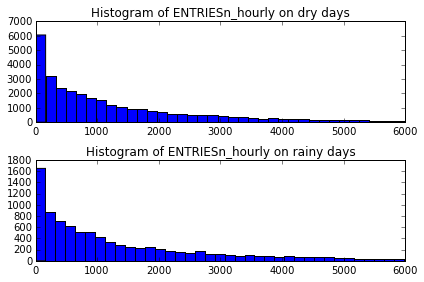

In [152]:
path = 'C:\Users\hakon.tromborg\Data Analyst Nanodegree\Data\weather_turnstile.csv'
data = pd.read_csv(path)

##Plotting the non-rainy days in the first subplot
ax1 = plt.subplot(211)
ax1.set_xlim(0,6000)
ax1.hist(data['ENTRIESn_hourly'][(data['rain']==0)],bins=200)
ax1.set_title("Histogram of ENTRIESn_hourly on dry days")

##Plotting the rainy days in the second subplot
ax2 = plt.subplot(212)
ax2.set_xlim(0,6000)
ax2.hist(data['ENTRIESn_hourly'][data['rain']==1].reset_index(drop=True), bins = 200)
ax2.set_title("Histogram of ENTRIESn_hourly on rainy days")

#Make sure x-axis of subplot 1 doesn't overlap with title of subplot 2
plt.tight_layout()


###3.2 Freeform visualisation

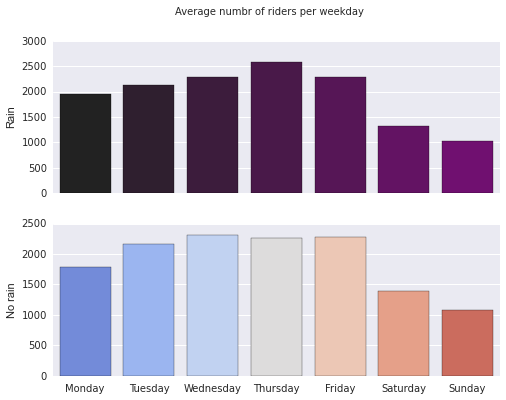

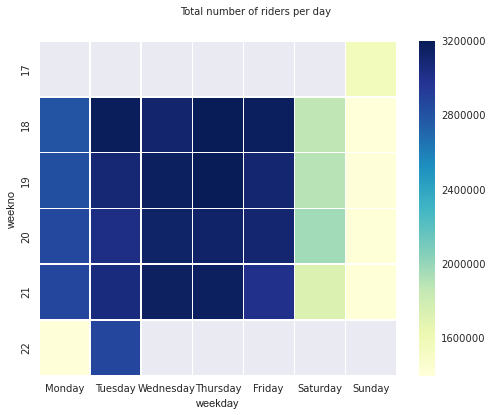

In [241]:
path = 'C:\Users\hakon.tromborg\Data Analyst Nanodegree\Data\weather_turnstile.csv'
data = pd.read_csv(path)
data['datetime']=pd.to_datetime(data['datetime'])

#Small function to get weekday, and then group the frame by it
getweekday =  lambda x: x.weekday()
getweekno = lambda x: x.isocalendar()[1]
data['weekday'] = data['datetime'].map(getweekday)
data['weekno'] = data['datetime'].map(getweekno)
grouped_by_weekday_norain = data[data['rain']==0].groupby('weekday')
grouped_by_weekday_rain = data[data['rain']==1].groupby('weekday')

#Getting dem days in the proper order :D
x = np.array(["Monday","Tuesday","Wednesday", "Thursday","Friday","Saturday","Sunday"])

#Plot two bar charts with seaborn
f1, (ax1,ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

sns.barplot(x=x, y=grouped_by_weekday_rain.mean()['ENTRIESn_hourly'], palette=sns.dark_palette("purple",7), ax=ax1)

sns.barplot(x=x, y=grouped_by_weekday_norain.mean()['ENTRIESn_hourly'], palette=sns.color_palette("coolwarm",7), ax=ax2)

#Set labels
ax1.set_ylabel("Rain")
ax2.set_ylabel("No rain")

#Set title
f1.suptitle("Average numbr of riders per weekday")

#Make an informative heatmap from a pivot table!
f2,ax3 = plt.subplots(1, 1, figsize=(8, 6), sharex=True)
pivot_table = data.pivot_table('ENTRIESn_hourly','weekno','weekday',aggfunc=np.sum)
f2.suptitle("Total number of riders per day")
sns.heatmap(pivot_table,linewidths=.3,
            cmap="YlGnBu",
            xticklabels=["Monday","Tuesday","Wednesday", "Thursday","Friday","Saturday","Sunday"])

## Section 4. Conclusion
### 4.1 From your analysis and interpretation of the data, do more people ride the NYC subway when it is raining or when it is not raining?  
#### More people ride it when it's raining.
### 4.2 What analyses lead you to this conclusion? 
#### Mainly the Mann-Whitney test, which gave a 95% confidence in there being a difference in the means of ridership on rainy versus non-rainy days. As the rainy days had a higher mean, this indicates that they are the days with the most riders. 
####However, looking at the regression model for predicting number of entries, the rain constant has a negative value. In other words, if there's rain (rain = 1) the model predicts a lower value for the ridership. Oops. How can this be?
#### The linear model has a pretty high value for the foggy days, and if rain and fog commonly appear together, the special case where there's rain but no fog might actually not lead to more riders of the subway. Removing fog as a factor from the OLS actually puts the constant for rain back to positive, so this might be the case (?)

##Section 5. Reflection
### 5.1 Please discuss potential shortcomings of the methods of your analysis, including:
#### 5.11 The dataset: Rain doesn't always affect people's entire days. One could perhaps improve the accuracy of the analysis by distinguishing between whether it rained withing the given 4-hour period of time in stead of the entire day, and do the same thing for the other collected values. 
#### 5.12 Analysis: As revealed by the negative coefficient for rain, some analysis should have been done looking at correlation for different values. Linear regression doesn't reveal correlation, for example low temperature and rain together might be a deadly combination. One way to do this could be to add a new variable for when it's fog and rain on the same day. Let's investigate!


In [240]:
def linear_regression(features, values):
    
    features = sm.add_constant(features)
    model = sm.OLS(values, features)
    results = model.fit()
    intercept = results.params[0]
    params = results.params[1:]
    
    return intercept, params

d = data
d['fograin'] = 0
# Make sure fograin is always one when there's both rain and fog
d.loc[( (d['rain'] == 1) & (d['fog'] == 1)),'fograin'] = 1

#Select features to compare weight of different features
features1 = d[['fograin','fog','rain','hour','meantempi']]
features2 = d[['fog','rain','hour','meantempi']]
dummy_units = pd.get_dummies(d['UNIT'], prefix='unit')

features1 = features1.join(dummy_units)
features2 = features2.join(dummy_units)


# Values
values = d['ENTRIESn_hourly']

# Perform linear regression
intercept1, params1 = linear_regression(features1, values)
intercept2, params2 = linear_regression(features2, values)

#Print weights
print "The results with fograin included"
print params1[:5]
print "Original results without fograin"
print params2[:4]

The results with fograin included
fograin     -875.252650
fog           17.185353
rain         143.431968
hour         123.515822
meantempi    -11.808344
dtype: float64
Original results without fograin
fog         -706.942842
rain         137.051521
hour         123.452232
meantempi    -11.689221
dtype: float64


#### Comparing these two sets of thetas, we can see that the addition of fograin makes the contribution from fog to the prediction almost disappear. The second result is, however, different from what was shown in the web compiler over at udacity. I'm unable to explain why that is, since I just copy-pasted the code. It's more in line with what you would expect though: rain is a positive contribution to the average ridership, while fog (or fograin for that matter) surprisingly is very negative.